In [18]:
#first read the csv and preview the data
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
df = pd.read_csv(url)
print(df.head)

<bound method NDFrame.head of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90 

In [19]:
#as in above preview we can see that medv is our target, lets rename it
df['target_price'] = df['medv']
df = df.drop('medv',axis = 1) #axis = 1, Essential to specify that you are operating on columns
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  target_price  
0  396.90   4.98          24.0  
1  396.90   9.14          21.6  
2  392.83   4.03          34.7  
3  394.63   2.94          33.4  
4  396.90   5.33          36.2  


In [22]:
#lets see the max/min value of each feature so we decide which feature needs scalling 
df.describe().T


,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [23]:
#based on above all feature require scaling except chas, scaling is must so that Gradient decent reaches Global minimum in less time
#for scalling I am using Z-score Normalization
def scaling(column):
    return (column - column.mean()) / column.std()
df['crim'] = scaling(df['crim'])
df['zn'] = scaling(df['zn'])
df['indus'] = scaling(df['indus'])
df['age'] = scaling(df['age'])
df['rm'] = scaling(df['rm'])
df['dis'] = scaling(df['dis'])
df['rad'] = scaling(df['rad'])
df['tax'] = scaling(df['tax'])
df['ptratio'] = scaling(df['ptratio'])
df['b'] = scaling(df['b'])
df['lstat'] = scaling(df['lstat'])

#check the min/max after scaling
df.describe().T


,count,mean,std,min,25%,50%,75%,max
crim,506.0,-1.123388e-16,1.000000,-0.419367,-0.410563,-0.390280,0.007389,9.924110
zn,506.0,6.319056e-17,1.000000,-0.487240,-0.487240,-0.487240,0.048724,3.800473
indus,506.0,2.527622e-16,1.000000,-1.556302,-0.866833,-0.210890,1.014995,2.420170
chas,506.0,6.916996e-02,0.253994,0.000000,0.000000,0.000000,0.000000,1.000000
nox,506.0,5.546951e-01,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
rm,506.0,-9.829643e-17,1.000000,-3.876413,-0.568068,-0.108358,0.482291,3.551530
age,506.0,-1.685082e-16,1.000000,-2.333128,-0.836620,0.317068,0.905902,1.116390
dis,506.0,-1.123388e-16,1.000000,-1.265817,-0.804891,-0.279047,0.661716,3.956602
rad,506.0,1.123388e-16,1.000000,-0.981871,-0.637331,-0.522484,1.659603,1.659603
tax,506.0,5.616939e-17,1.000000,-1.312691,-0.766817,-0.464213,1.529413,1.796416


In [25]:
#its a know issue in boston housing data that target_price at 50 has skewed output so can remove that
filtered_df = df[df['target_price'] < 50]
filtered_df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,490.0,0.003455,1.014022,-0.419367,-0.410563,-0.391327,0.003941,9.924110
zn,490.0,-0.010779,0.979512,-0.487240,-0.487240,-0.487240,0.048724,3.800473
indus,490.0,-0.003445,0.994308,-1.515487,-0.866833,-0.210890,1.014995,2.420170
chas,490.0,0.059184,0.236209,0.000000,0.000000,0.000000,0.000000,1.000000
nox,490.0,0.554307,0.116688,0.385000,0.449000,0.538000,0.624000,0.871000
rm,490.0,-0.055739,0.929592,-3.876413,-0.574473,-0.141805,0.417533,3.551530
age,490.0,-0.010513,1.000566,-2.333128,-0.853495,0.292200,0.898797,1.116390
dis,490.0,0.018747,1.002012,-1.262302,-0.799727,-0.246540,0.674147,3.956602
rad,490.0,-0.004034,0.998167,-0.981871,-0.637331,-0.522484,1.659603,1.659603
tax,490.0,-0.001395,0.997200,-1.312691,-0.759400,-0.464213,1.529413,1.796416


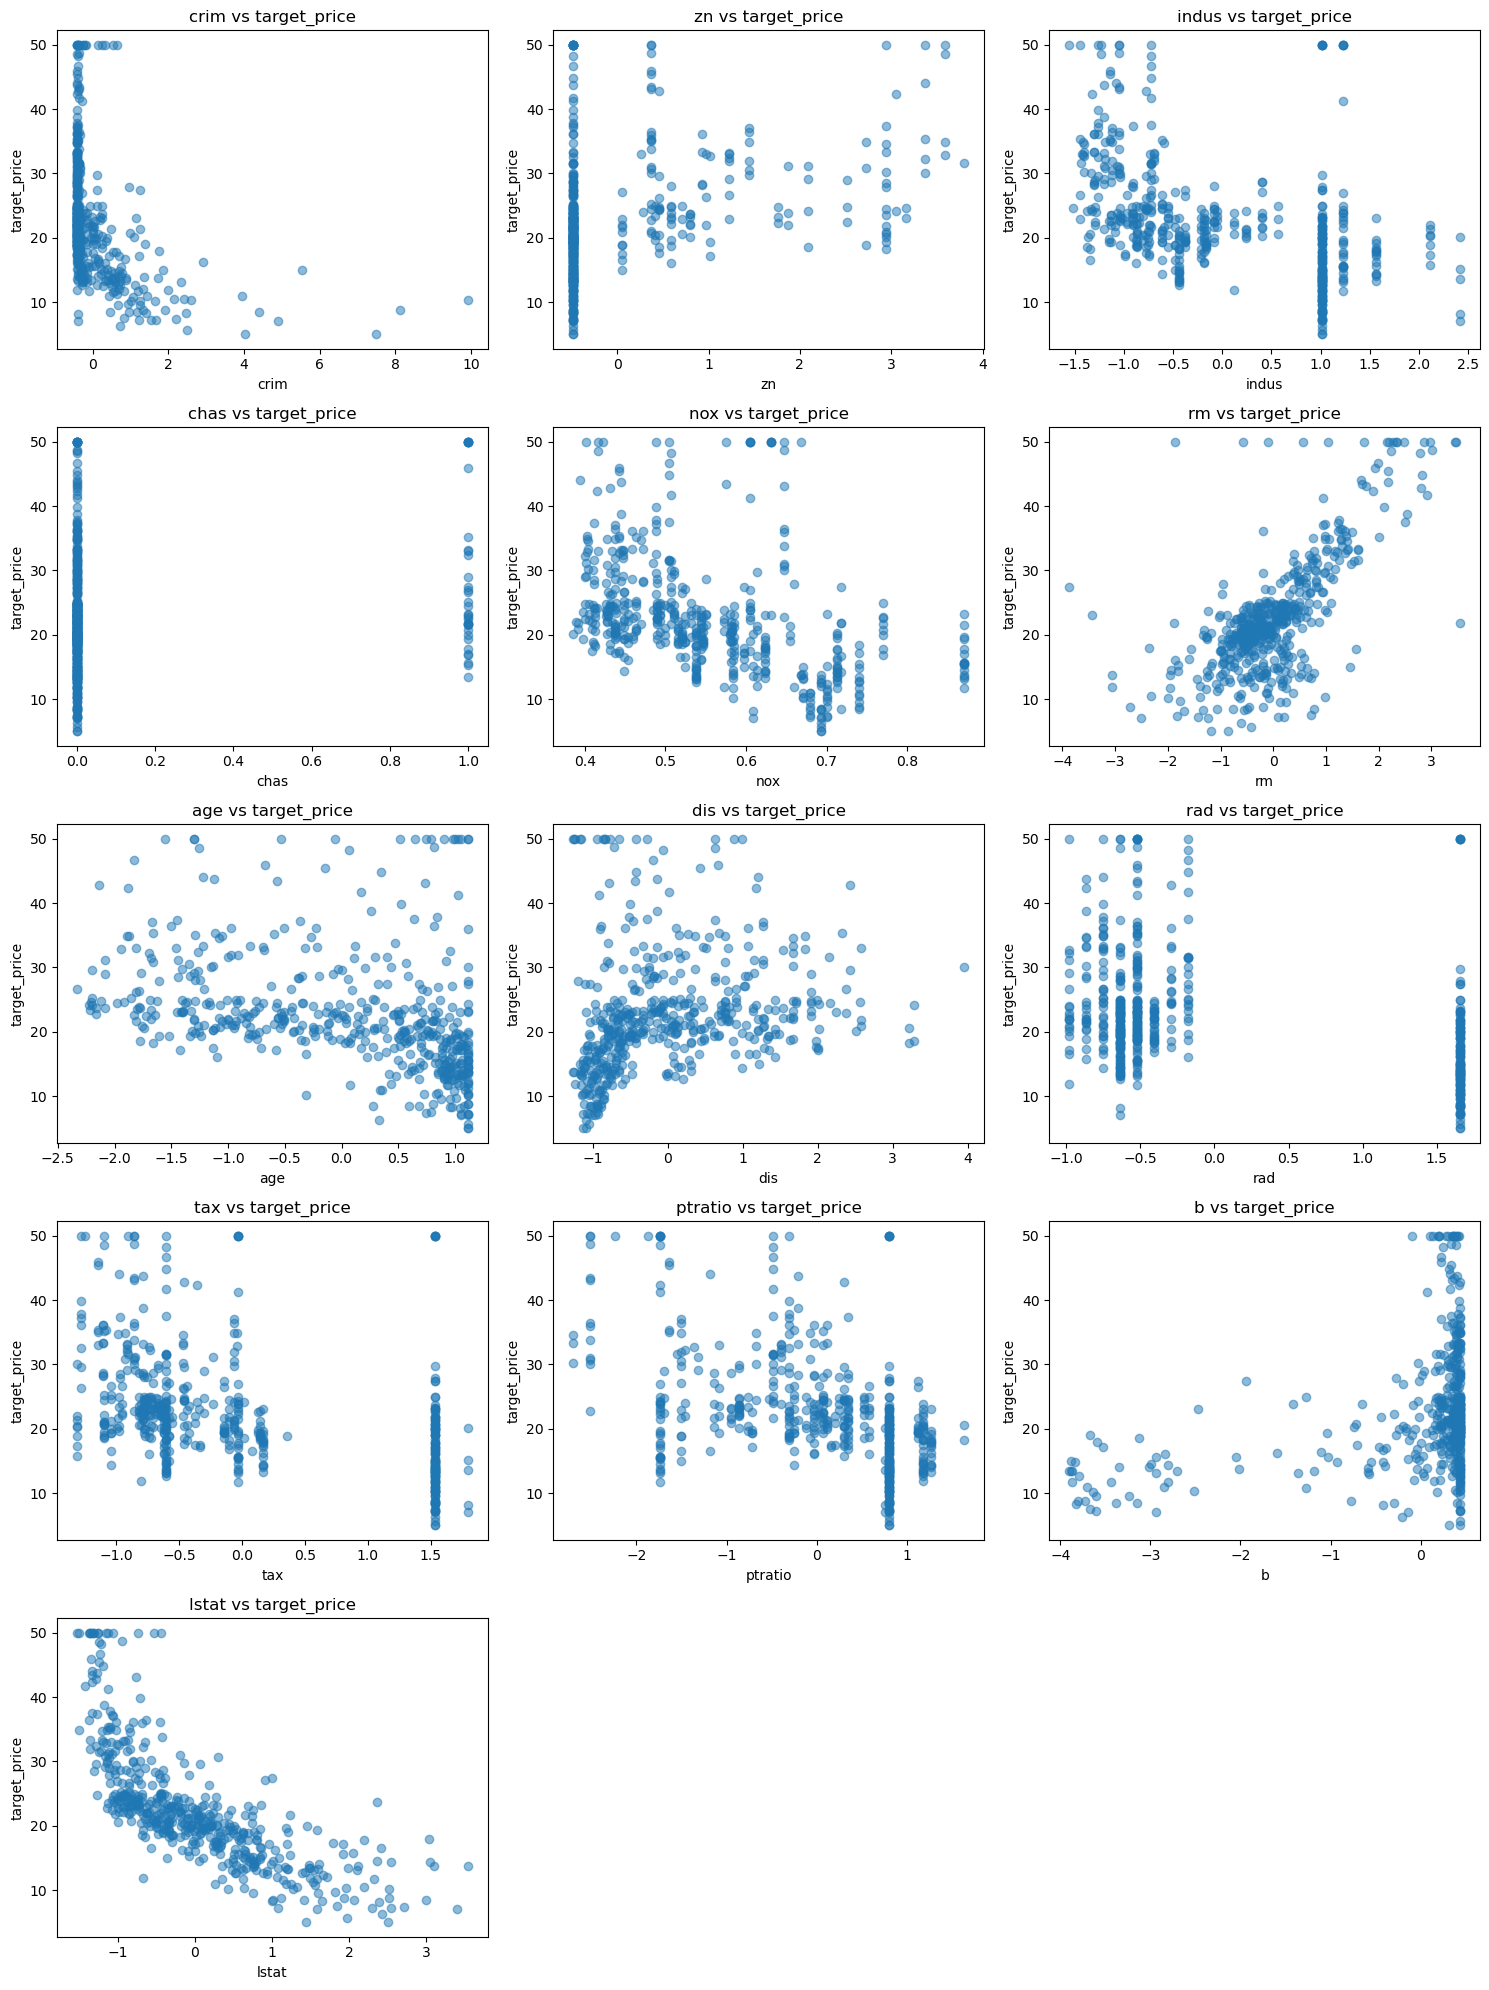

In [27]:
#lets evaluate each feature against the target value to see if any feature require feature engineering
import matplotlib.pyplot as plt

# Exclude the target column
feature_columns = [col for col in df.columns if col != 'target_price']
n_features = len(feature_columns)

# Grid size (e.g., 3 columns, auto rows)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(feature_columns):
    axes[i].scatter(df[column], df['target_price'], alpha=0.5)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('target_price')
    axes[i].set_title(f'{column} vs target_price')

# Turn off empty plots if features don't fill the grid
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [28]:
# Correlation matrix
corr_matrix = df.corr()

# Correlation with target sorted
target_col = 'target_price'
corr_with_target = corr_matrix[target_col].sort_values(ascending=False)
print("Correlation with target:\n", corr_with_target)


Correlation with target:
 target_price    1.000000
rm              0.695360
zn              0.360445
b               0.333461
dis             0.249929
chas            0.175260
age            -0.376955
rad            -0.381626
crim           -0.388305
nox            -0.427321
tax            -0.468536
indus          -0.483725
ptratio        -0.507787
lstat          -0.737663
Name: target_price, dtype: float64


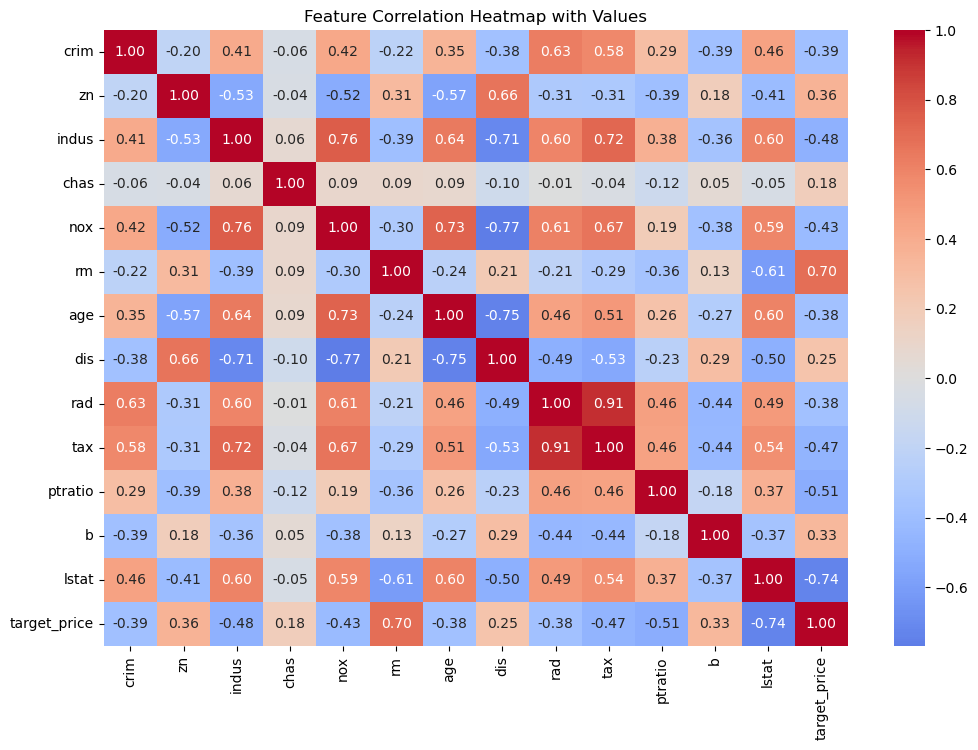

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap with Values")
plt.show()



In [37]:
#indus, no, rm, pratio, tax, lstat, age, dis
#based on above correlation lets minimize the feature to
new_df = filtered_df[['indus','nox','rm','ptratio','tax','lstat','age','dis','target_price']]
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
indus,490.0,-0.003445,0.994308,-1.515487,-0.866833,-0.210890,1.014995,2.420170
nox,490.0,0.554307,0.116688,0.385000,0.449000,0.538000,0.624000,0.871000
rm,490.0,-0.055739,0.929592,-3.876413,-0.574473,-0.141805,0.417533,3.551530
ptratio,490.0,0.029777,0.974841,-2.704703,-0.487557,0.297683,0.805778,1.637208
tax,490.0,-0.001395,0.997200,-1.312691,-0.759400,-0.464213,1.529413,1.796416
lstat,490.0,0.037944,0.991895,-1.494605,-0.742966,-0.136963,0.625178,3.545262
age,490.0,-0.010513,1.000566,-2.333128,-0.853495,0.292200,0.898797,1.116390
dis,490.0,0.018747,1.002012,-1.262302,-0.799727,-0.246540,0.674147,3.956602
target_price,490.0,21.635918,7.865301,5.000000,16.700000,20.900000,24.675000,48.800000


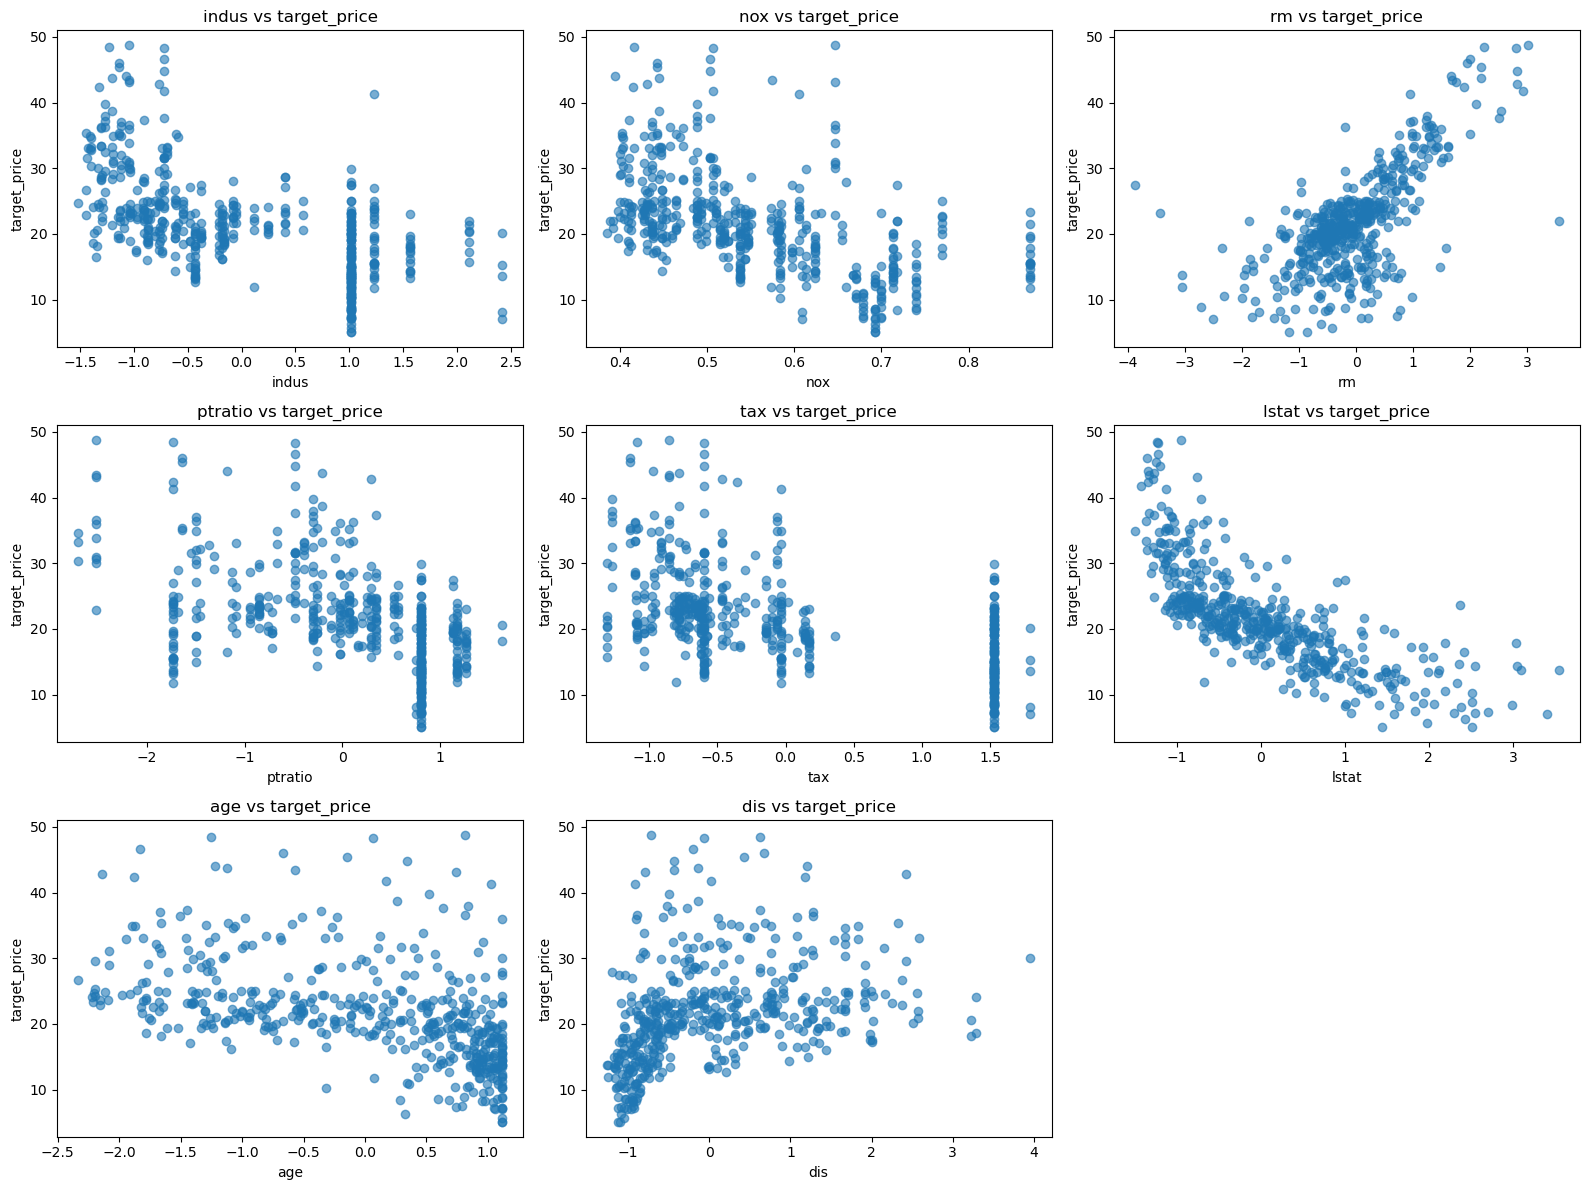

In [40]:
#now lets see how each feature is behaving agaisnt the target, so we can do feature engineering
import matplotlib.pyplot as plt

features = ['indus', 'nox', 'rm', 'ptratio', 'tax', 'lstat', 'age', 'dis']

plt.figure(figsize=(16, 12))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(new_df[col], new_df['target_price'], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('target_price')
    plt.title(f'{col} vs target_price')

plt.tight_layout()
plt.show()


for 0 iteration cost is 264.9248367346939
for 1 iteration cost is 237.52607243066356
for 2 iteration cost is 212.96091667969617
for 3 iteration cost is 190.93631475102188
for 4 iteration cost is 171.18951993758807
for 5 iteration cost is 153.4849590688622
for 6 iteration cost is 137.61142219554668
for 7 iteration cost is 123.37954292001005
for 8 iteration cost is 110.61953931355471
for 9 iteration cost is 99.17918847035973
for 10 iteration cost is 88.92201053515252
for 11 iteration cost is 79.72564054061897
for 12 iteration cost is 71.48036863107464
for 13 iteration cost is 64.08783125771566
for 14 iteration cost is 57.45983773181181
for 15 iteration cost is 51.51731813698366
for 16 iteration cost is 46.189380049481365
for 17 iteration cost is 41.41246281342914
for 18 iteration cost is 37.12957928179946
for 19 iteration cost is 33.289635977321176
for 20 iteration cost is 29.846823563050258
for 21 iteration cost is 26.760070351105448
for 22 iteration cost is 23.992552330096302
for 23 it

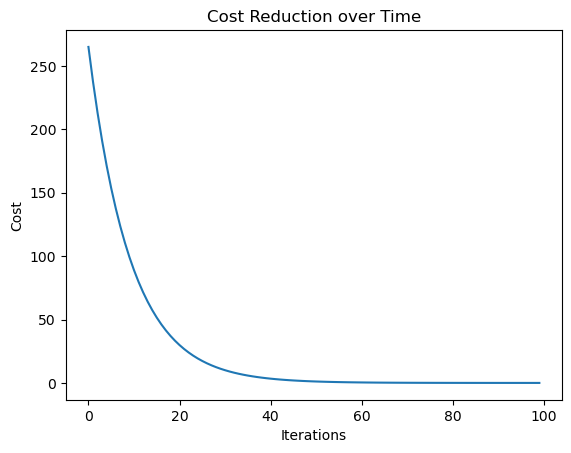

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def grad_dec(x, y, w_init, b_init, alpha, iterations):
    w = w_init.copy()
    b = b_init
    cost_his = []
    m = len(y)
    
    for _ in range(iterations):
        # Predictions
        y_pred = np.dot(x, w) + b
        
        # Errors
        err = y_pred - y
        
        # Gradients (vectorized)
        dw = (1/m) * np.dot(x.T, err)
        db = (1/m) * np.sum(err)
        
        # Parameter update
        w -= alpha * dw
        b -= alpha * db
        
        # Cost (MSE)
        cost = (1 / (2 * m)) * np.sum(err ** 2)
        cost_his.append(cost)
        print(f'for {_} iteration cost is {cost}')
    
    return w, b, cost_his


# Create features (including polynomials)
X_df = new_df[['indus', 'nox', 'rm', 'ptratio', 'tax', 'lstat', 'age', 'dis']].copy()
#adding sq(polynomial) beacuse of there graphical behaviour agaist the target
X_df['lstat_sq'] = X_df['lstat'] ** 2 
X_df['dis_sq'] = X_df['dis'] ** 2
X_df['nox_sq'] = X_df['nox'] ** 2

# Convert to numpy
x = new_df.to_numpy()
y = new_df[['target_price']].to_numpy().flatten()  # flatten to 1D

# Init params
w_init = np.zeros(x.shape[1])
b_init = 0
alpha = 1e-4
iterations = 100

# Run gradient descent
w_final, b_final, cost_history = grad_dec(x, y, w_init, b_init, alpha, iterations)

print("Final weights:", w_final)
print("Final bias:", b_final)
print('Final cost:', cost_history[-1])

# Plot cost history
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction over Time")
plt.show()


[-0.00874726  0.02161308  0.00706093 -0.00614173 -0.00830572 -0.00940993
 -0.00752359  0.0060247   0.99318696] 0.04058381727931168


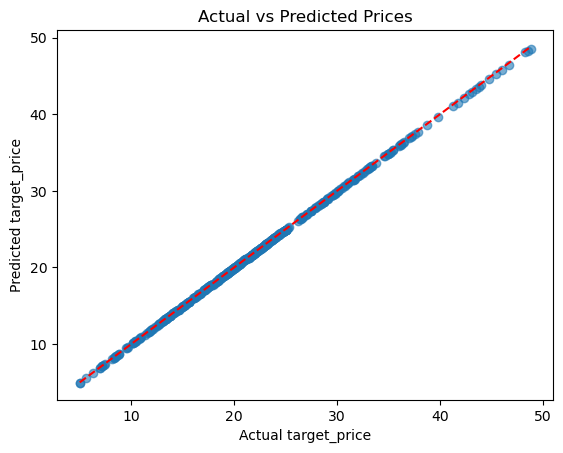

In [82]:
# Predictions using final weights and bias
y_pred = np.dot(x, w_final) + b_final
print(w_final,b_final)
# Scatter plot of actual vs predicted
plt.scatter(y, y_pred, alpha=0.6)
plt.xlabel("Actual target_price")
plt.ylabel("Predicted target_price")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.show()
